# Q1. What is Gradient Boosting Regression?

Gradient Boosting Regression is a machine learning technique that focuses on building strong predictive models by combining the efforts of several weaker models, typically decision trees. 

1.Initial Model:

*    It starts with a simple model, which could be just a prediction with a fixed value for all instances in the dataset.

2.Residuals Calculation:

*    The errors (residuals) of this initial model are then calculated, which represents the difference between the predicted values and the actual values.

3.New Model Training:

*    A new model, usually a decision tree, is trained to predict these residuals instead of the actual target variable.

4.Model Update:

*    The predictions of this new model are combined with the predictions of the earlier model(s) to get an updated model.

5.Repeat:

*    Steps 2 to 4 are repeated for a specified number of iterations, or until the error in predictions reaches a desirable low level.

6.Shrinkage:

*    Often, a shrinkage parameter (learning rate) is introduced to slow down the learning process, which helps in achieving a more generalized model.

7.Output:

*    The final model is the sum of the initial model and the weighted sum of the sequence of trees built, which can now be used to make predictions on new data.

The main idea behind gradient boosting is to consecutively minimize the errors of the previous models by adding new models to the ensemble. By doing this iteratively, Gradient Boosting Regression can often achieve very high levels of accuracy in predicting continuous target variables.

# Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a simple regression problem as an example and train the model on a small dataset. Evaluate the model's performance using metrics such as mean squared error and R-squared.

In [1]:
from sklearn.datasets import make_regression
X,Y = make_regression(n_samples=1000,n_features=1,n_informative=1, noise=20,random_state=43)

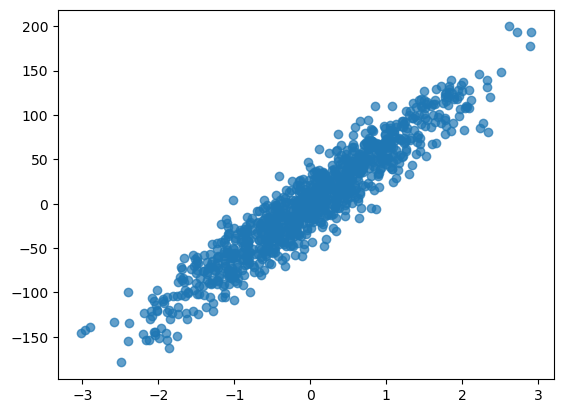

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X,Y,alpha=0.7)

In [3]:
# Split dataset into train and test sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=42) 

In [4]:
xtrain.shape

(800, 1)

In [5]:
xtest.shape

(200, 1)

In [6]:
# Define number of trees and learning rate
n_estimators = 1000
learning_rate = 0.001

In [7]:
# Initialize ensemble predictions to the mean of the target variable
import numpy as np
ensemble_preds = np.full_like(ytrain, np.mean(ytrain))

In [8]:
# Train the model using gradient boosting
from sklearn.tree import DecisionTreeRegressor
stubs = []
for i in range(n_estimators):
    # Compute the residual between the current predictions and the true target values
    residuals = ytrain - ensemble_preds
    
    # Fit a regression tree to the residuals
    tree = DecisionTreeRegressor(max_depth=3)
    tree.fit(xtrain, residuals)

    stubs.append(tree)
    
    # Update the ensemble predictions with the current tree's predictions
    ensemble_preds += learning_rate * tree.predict(xtrain)

In [9]:
# Evaluate the model on the test set
y_pred = np.full_like(ytest, np.mean(ytrain))
for i in range(n_estimators):
    y_pred += learning_rate * stubs[i].predict(xtest)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

In [11]:
print("Mean squared error:", mse)
print("R-squared:", r2)

Mean squared error: 822.8074571899081
R-squared: 0.7836513313762161


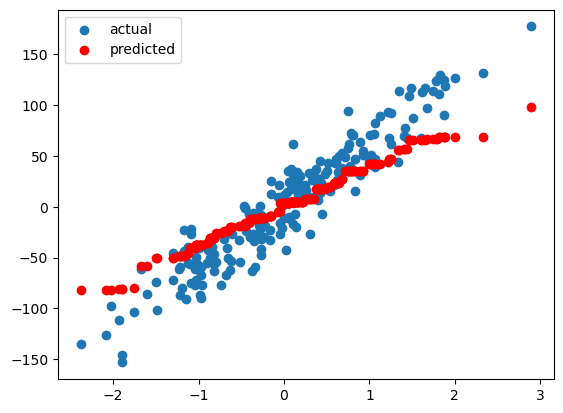

In [12]:
plt.scatter(xtest,ytest,label='actual')
plt.scatter(xtest, y_pred,c='r',label='predicted')
plt.legend()
plt.show()

# Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to optimise the performance of the model. Use grid search or random search to find the best hyperparameters

In [13]:
# Creating Synthetic dataset
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
X, Y = make_regression(n_samples=1000, n_features=5, n_informative=3, noise=10, random_state=42)

In [14]:
# Train Test Split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [15]:
xtrain.shape

(800, 5)

In [16]:
xtest.shape

(200, 5)

**Define Parameter Grid**

In [18]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5]
}

**GridSearchCV**

In [19]:
# Create a gradient boosting regressor object
gbm = GradientBoostingRegressor()

# Create a grid search object
grid_search = GridSearchCV(gbm, param_grid=param_grid, 
                           scoring='neg_mean_squared_error',cv=5, n_jobs=-1)

# Fit the grid search object to the data
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [20]:
# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best score:  -162.84409687667875


**Evaluate on test data**

In [21]:
# Evaluate the performance of the model on the test set
y_pred = grid_search.predict(xtest)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Mean squared error:  147.37231774942512
R-squared score:  0.9475235188252507


# Q4. What is a weak learner in Gradient Boosting?

A weak learner in gradient boosting is a model that performs slightly better than random guessing. In the context of gradient boosting, a weak learner is typically a decision tree with a small number of leaf nodes (also called a "shallow" decision tree), since it can only make simple splits in the data.

The idea behind gradient boosting is to iteratively add weak learners to the ensemble, where each new learner tries to improve the performance of the previous learners. In each iteration, the gradient boosting algorithm fits a new weak learner to the negative gradient of the loss function with respect to the current predictions of the ensemble. This allows the algorithm to "correct" the errors made by the previous learners and gradually improve the overall performance of the ensemble.

Since the weak learners are simple and have low variance, they are less prone to overfitting than more complex models. This allows gradient boosting to achieve good performance on a variety of regression and classification problems, even when the number of features is large and the relationships between features and target variable are complex. However, it also means that gradient boosting may require a large number of weak learners to achieve good performance, which can increase the training time and memory usage of the algorithm.

# Q5. What is the intuition behind the Gradient Boosting algorithm?

Gradient Boosting is a powerful ensemble machine learning algorithm that builds a model from an ensemble of weaker models, typically decision trees. It's particularly useful for regression, classification, and ranking tasks

**1. Weak Models:**

Gradient Boosting combines multiple weak predictive models, usually shallow trees, to create a more accurate and robust model. A weak model has better accuracy than random guessing but is not highly accurate in predicting the target variable.

**2. Sequential Learning:**

Unlike Random Forest, which builds trees in parallel, Gradient Boosting builds trees sequentially. Each tree tries to correct the mistakes of its predecessor, focusing more on the instances that were misclassified or have higher errors.

**3. Gradient Descent:**

The "Gradient" in Gradient Boosting refers to Gradient Descent, an optimization algorithm used to minimize the loss function. In each step, the algorithm calculates the gradient of the loss function with respect to the prediction and then builds a tree to model this gradient. This new tree is then added to the ensemble to move the model's predictions in the direction that minimally decreases the overall error.

**4. Weighted Sum:**

The final prediction is a weighted sum of the predictions from individual trees. The weights are assigned based on the contribution of each tree in reducing the overall error.

**5. Learning Rate:**

Gradient Boosting has a learning rate parameter that scales the contribution of each tree. A smaller learning rate requires more trees in the ensemble but often results in better generalization to the test data.

**6. Regularization:**

It includes several regularization techniques, like shrinkage and pruning, to avoid overfitting by controlling the complexity of the individual trees and the final ensemble.

 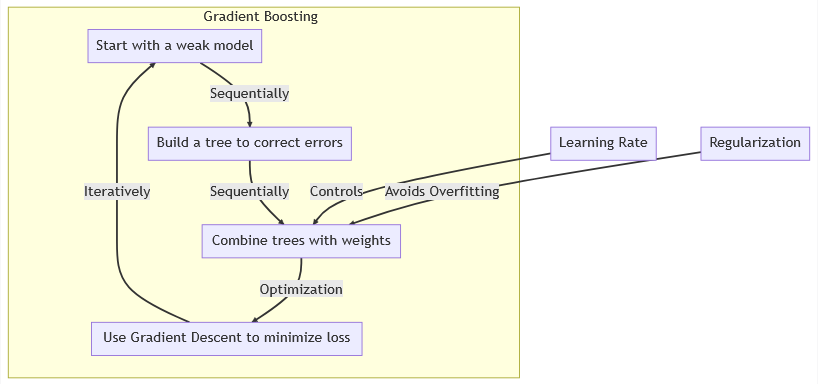
 
**illustrating the intuition behind the Gradient Boosting algorithm:** 
 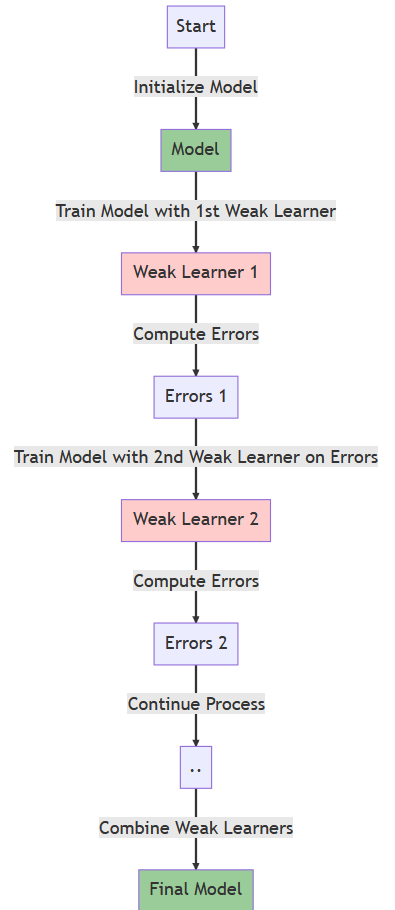

# Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?

Gradient Boosting is an ensemble machine learning algorithm that builds a model from a collection of simpler, weaker models, typically decision trees

### Step by Step Process

**1.Initialization**

*    Starts by predicting a constant value for all the observations.

*    Calculates the loss (difference) between the predicted and actual values.

**2.Building Weak Models**

*    Builds a weak model (typically a shallow decision tree) to correct the mistakes of the previous model.

*    The weak model predicts the residuals (or the negative gradient of the loss function) from the previous step.

**3.Weighted Sum**

*    The output of the weak model is multiplied by a learning rate and added to the previous model's predictions.

**4.Iterative Learning**

*    Steps 2 and 3 are repeated iteratively to minimize the loss, and sequentially add more weak models, each one correcting the mistakes of the sum of the preceding models.

**5.Final Model**

*    The final model is the weighted sum of all the weak models.

# Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting algorithm?

The mathematical intuition behind Gradient Boosting involves several steps and focuses on optimizing a loss function.

**1. Initialization**

Initialize the model with a constant prediction. This could be the mean (for regression problems) or the most frequent label (for classification problems) of the target variable.
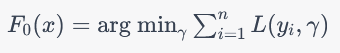

**2. Compute Residuals**
Compute the residuals, which are the differences between the observed actual outcomes and the predictions of the model. For a given loss function L(y,F(x)) the residual is the negative gradient of the loss function with respect to the prediction F(x).
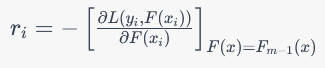

**3. Fit Weak Model**
Fit a weak model (e.g., a shallow decision tree) to the residuals from the previous step. This model will predict the residuals, not the actual target variable.
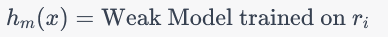

**4. Compute Optimal Coefficient**
Find the optimal coefficient γm that minimizes the loss when the weak model is added to the existing ensemble. This is usually done using line search.
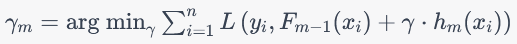

**5. Update Model**
Update the model by adding the weighted weak model to the ensemble of models.
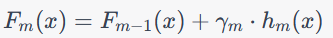

**6. Iterate**
Repeat steps 2-5 until a predetermined number of models are added or until perfect predictions are achieved.

**7.Final Prediction**
The final prediction is the sum of the initial prediction and the contributions from all the weak models.
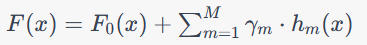
